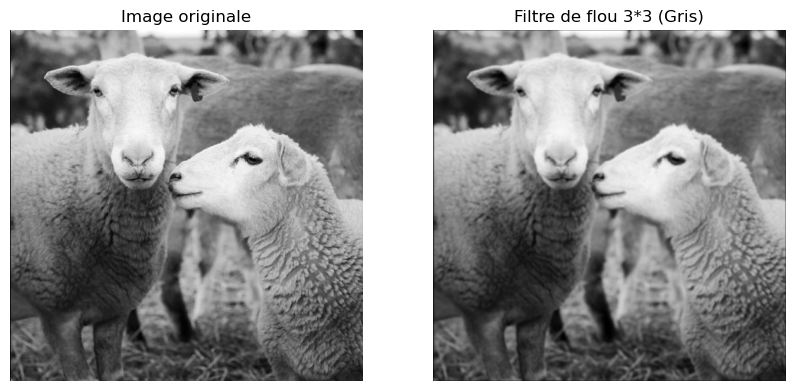

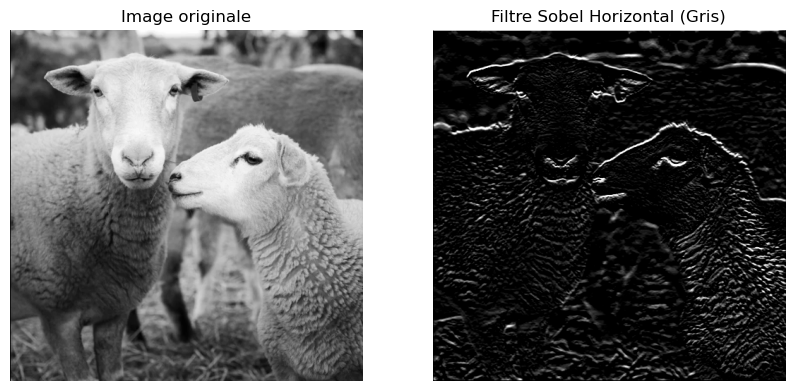

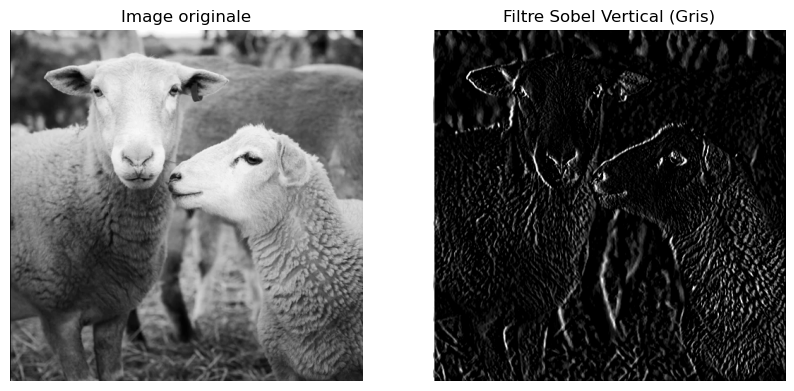

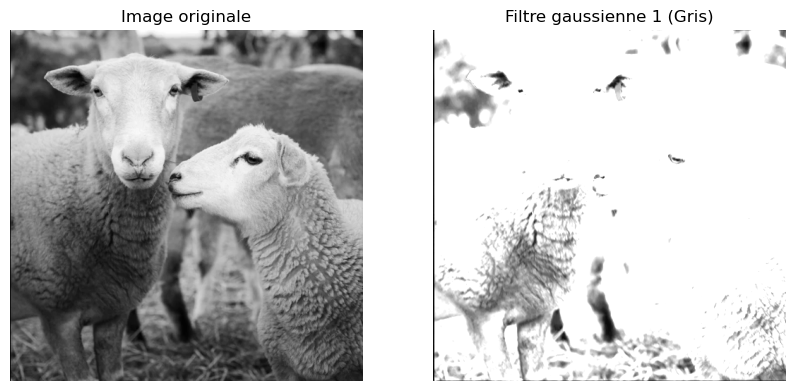

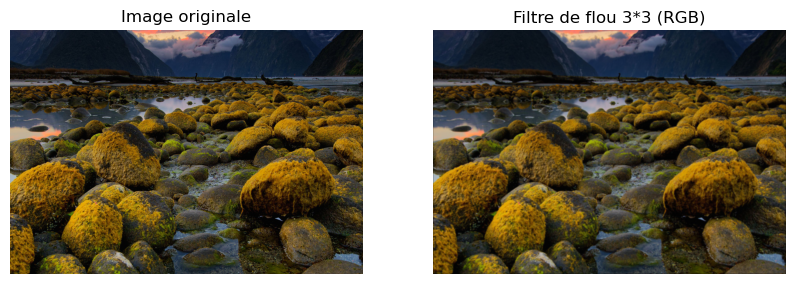

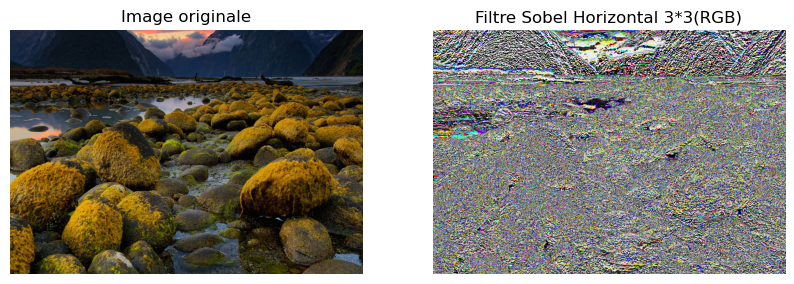

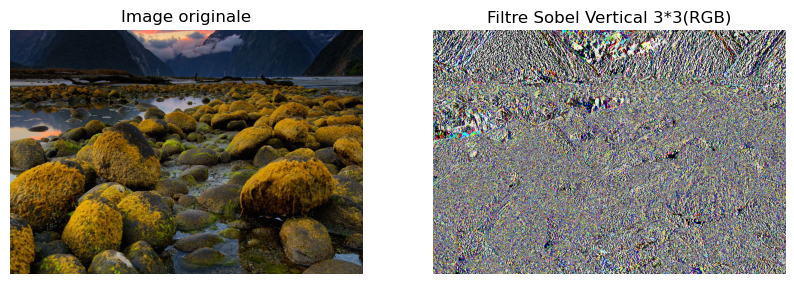

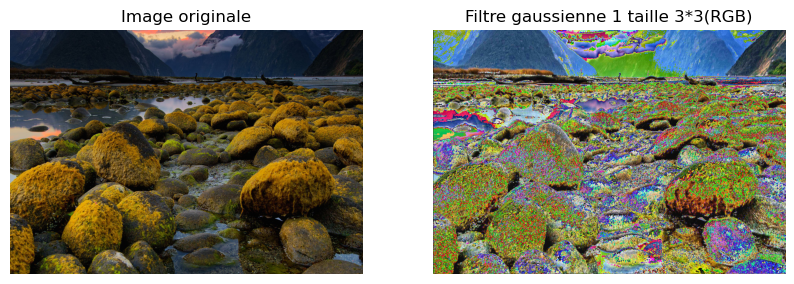

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt  # Missing import

# Load images
gray_image = cv2.imread("1.png", cv2.IMREAD_GRAYSCALE)  # Fixed typo in IMREAD_GRAYSCALE
rgb_image = cv2.imread("12.png") 
rgb_image = rgb_image[:,:,::-1]

# Check if images are loaded correctly
if gray_image is None:
    raise ValueError("Failed to load gray image (1.png)")
if rgb_image is None:
    raise ValueError("Failed to load RGB image (12.png)")

def convolve_channel(image, kernel):
    # Calculate padding size based on kernel (generalized for any kernel size)
    pad_size = kernel.shape[0] // 2
    padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant', constant_values=0)
    
    output = np.zeros_like(image, dtype=np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            output[i, j] = np.sum(padded[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return output

def apply_convolution(image, kernel):
    # Input validation
    assert isinstance(image, np.ndarray), "L'image doit être un tableau NumPy"
    assert isinstance(kernel, np.ndarray), "Le noyau doit être un tableau NumPy"
    assert len(kernel.shape) == 2, "Le noyau doit être une matrice 2D"
    assert kernel.shape[0] == kernel.shape[1], "Le noyau doit être carré"
    assert kernel.shape[0] % 2 == 1, "Le noyau doit avoir une taille impaire"

    if len(image.shape) == 3:  # Image RGB
        output = np.zeros_like(image)
        for c in range(image.shape[2]):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel)
    else:  # Image grise
        output = convolve_channel(image, kernel)
    return np.clip(output, 0, 255).astype(np.uint8)

def display_images(original, filtered, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Image originale")
    plt.imshow(original, cmap='gray' if len(original.shape) == 2 else None)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(filtered, cmap='gray' if len(filtered.shape) == 2 else None)
    plt.axis('off')
    plt.show()

# Define kernels
blur_kernel = np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
sobel_horizontal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Fixed sobel vertical kernel
np.random.seed(42)
filter_gaussiene = np.random.normal(0, 1, (3, 3))



# Apply convolutions
blurred_gray = apply_convolution(gray_image, blur_kernel)
sobel_h_gray = apply_convolution(gray_image, sobel_horizontal)
sobel_v_gray = apply_convolution(gray_image, sobel_vertical)
filter_gaussiene_gray = apply_convolution(gray_image,filter_gaussiene)


blurred_rgb = apply_convolution(rgb_image, blur_kernel)
sobel_h_rgb = apply_convolution(rgb_image, sobel_horizontal)
sobel_v_rgb = apply_convolution(rgb_image, sobel_vertical)
filter_gaussiene_rgb = apply_convolution(rgb_image, filter_gaussiene)


# Display results
display_images(gray_image, blurred_gray, "Filtre de flou 3*3 (Gris)")
display_images(gray_image, sobel_h_gray, "Filtre Sobel Horizontal (Gris)")
display_images(gray_image, sobel_v_gray, "Filtre Sobel Vertical (Gris)")
display_images(gray_image, filter_gaussiene_gray, "Filtre gaussienne 1 (Gris)")



display_images(rgb_image, blurred_rgb, "Filtre de flou 3*3 (RGB)")

display_images(rgb_image, sobel_h_rgb, "Filtre Sobel Horizontal 3*3(RGB)")
display_images(rgb_image, sobel_v_rgb, "Filtre Sobel Vertical 3*3(RGB)")
display_images(rgb_image, filter_gaussiene_rgb, "Filtre gaussienne 1 taille 3*3(RGB)")

